In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical

In [20]:
text = """
In the middle of the night, the wind howled loudly. The trees danced wildly under the moonlight.
It was a night to remember, mysterious and full of whispers from the forest.
"""

tokenization:-

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1


create input sequence:-

In [22]:
input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]

for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


Pad sequencing:-

In [23]:
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))


Split into input and labels

In [24]:
X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)


build the model:-


In [25]:
def build_model(rnn_type='LSTM'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(total_words, 10, input_length=max_seq_len - 1))
    if rnn_type == 'RNN':
        model.add(tf.keras.layers.SimpleRNN(100))
    elif rnn_type == 'GRU':
        model.add(tf.keras.layers.GRU(100))
    elif rnn_type == 'LSTM':
        model.add(tf.keras.layers.LSTM(100))
    model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


 Train and compaire the model :-

In [26]:
models = ['RNN', 'GRU', 'LSTM']
results = {}

for model_type in models:
    print(f"\nTraining {model_type} model...")
    model = build_model(model_type)
    history = model.fit(X, y, epochs=100, verbose=0)
    loss, acc = model.evaluate(X, y, verbose=0)
    results[model_type] = (loss, acc)


Training RNN model...

Training GRU model...

Training LSTM model...


plot result:-

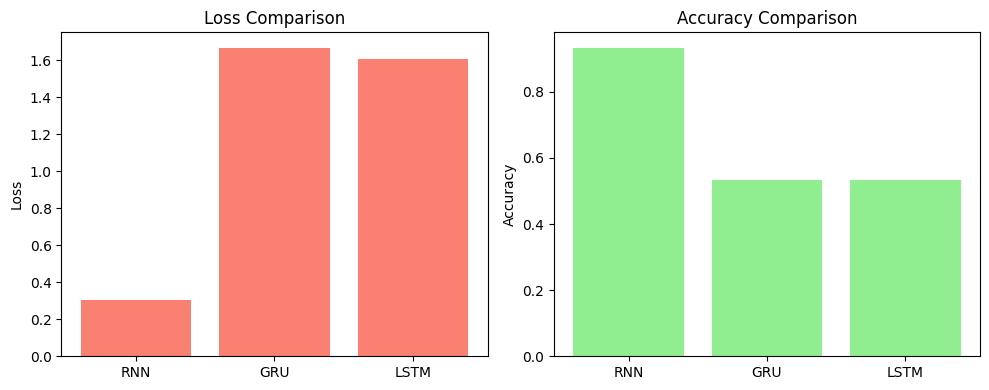

In [27]:
import matplotlib.pyplot as plt

losses = [results[m][0] for m in models]
accuracies = [results[m][1] for m in models]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(models, losses, color='salmon')
plt.title("Loss Comparison")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.bar(models, accuracies, color='lightgreen')
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


Test prediction:-

In [28]:
def predict_next_word(model, seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)


In [33]:
predict_next_word(model, "i love", next_words=1)


i love the
